# י $PyTorch$ יסודות — גרסה מותאמת ל-$MPS$ ($Apple Silicon$, $Mac$ $M1/M2/M3$) י  

י מחברת זו מסבירה שלב-שלב את הפעולות הבסיסיות ב-$PyTorch$, תוך התאמה לעבודה על מחשבי $Mac$ עם שבבי $Apple$ (באמצעות $MPS$). י  

**י שים לב:** איננו משתמשים ב-$CUDA$ כלל! י

In [1]:
# קביעת ה-device לעבודה — MPS אם קיים, אחרת CPU
import torch

if torch.backends.mps.is_available():
    device = torch.device('mps')
    print('Using MPS (Apple GPU)')
else:
    device = torch.device('cpu')
    print('Using CPU')

Using MPS (Apple GPU)


## י יצירת טנסור רנדומלי בגודל $(7, 7)$ ובדיקה שהוא על ה-$device$ הנכון י  

In [2]:
# יצירת טנסור רנדומלי בגודל (7, 7)
X = torch.rand(size=(7, 7)).to(device)
print(X)
print('Shape:', X.shape)
print('Device:', X.device)

tensor([[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
        [0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935],
        [0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380],
        [0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857, 0.0430],
        [0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106],
        [0.5948, 0.1885, 0.0705, 0.9756, 0.1516, 0.1020, 0.5220],
        [0.9566, 0.2248, 0.5625, 0.9226, 0.6155, 0.4774, 0.9515]],
       device='mps:0')
Shape: torch.Size([7, 7])
Device: mps:0


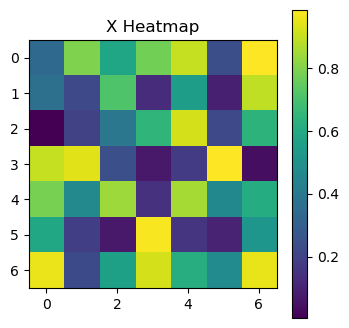

In [3]:
# גרף: מציג את X כ-Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(X.cpu().numpy(), cmap='viridis')
plt.title('X Heatmap')
plt.colorbar()
plt.show()

## י יצירת טנסור רנדומלי נוסף בגודל $(1, 7)$ וביצוע כפל מטריצות (כולל טרנספוזיציה) י  

In [4]:
# יצירת טנסור נוסף בגודל (1, 7)
Y = torch.rand(size=(1, 7)).to(device)

# ביצוע כפל מטריצות: X בגודל (7,7), Y.T בגודל (7,1)
Z = torch.matmul(X, Y.T)
print(Z)
print('Shape:', Z.shape)
print('Device:', Z.device)

tensor([[2.0475],
        [1.4441],
        [1.3460],
        [1.8371],
        [2.0787],
        [1.4524],
        [2.6148]], device='mps:0')
Shape: torch.Size([7, 1])
Device: mps:0


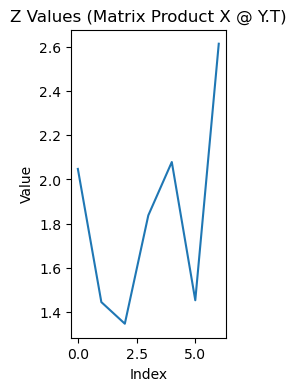

In [5]:
# גרף: ערכי Z (תוצאה של כפל מטריצות)
plt.figure(figsize=(2,4))
plt.plot(Z.cpu().numpy())
plt.title('Z Values (Matrix Product X @ Y.T)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## י חישוב ערך מינימלי, ערך מקסימלי והפרש ביניהם י  

In [6]:
# מציאת ערך מינימלי ומקסימלי והפרש ביניהם
X_min = X.min()
X_max = X.max()
X_diff = X_max - X_min
print('Min:', X_min.item())
print('Max:', X_max.item())
print('Difference:', X_diff.item())

Min: 0.0050820112228393555
Max: 0.9856880903244019
Difference: 0.9806060791015625


## י מציאת אינדקס הערך המקסימלי והערך המינימלי י  

In [7]:
# אינדקס של הערך המקסימלי
X_argmax = X.argmax()
# אינדקס של הערך המינימלי
X_argmin = X.argmin()
print('Argmax:', X_argmax.item())
print('Argmin:', X_argmin.item())

Argmax: 26
Argmin: 14


## י שינוי טיפוס נתונים של טנסור ל־$float16$ י  

In [8]:
# שינוי טיפוס הנתונים ל-float16
X_float16 = X.type(torch.float16)
print(X_float16)
print('dtype:', X_float16.dtype)

tensor([[0.3386, 0.7954, 0.5830, 0.7749, 0.9009, 0.2426, 0.9819],
        [0.3652, 0.2211, 0.7173, 0.1283, 0.5498, 0.0899, 0.8936],
        [0.0051, 0.1942, 0.3931, 0.6450, 0.9238, 0.2208, 0.6382],
        [0.8979, 0.9414, 0.2450, 0.0716, 0.1775, 0.9858, 0.0430],
        [0.7852, 0.4673, 0.8403, 0.1442, 0.8521, 0.4624, 0.6108],
        [0.5947, 0.1885, 0.0706, 0.9756, 0.1516, 0.1021, 0.5220],
        [0.9565, 0.2249, 0.5625, 0.9224, 0.6157, 0.4773, 0.9517]],
       device='mps:0', dtype=torch.float16)
dtype: torch.float16


## י שינוי צורת הטנסור ($Reshape$) י  

In [9]:
# Reshape ל-(1, 49)
X_reshaped = X.reshape(1, 49)
print(X_reshaped)
print('Shape:', X_reshaped.shape)

tensor([[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821, 0.3653, 0.2211,
         0.7174, 0.1283, 0.5496, 0.0899, 0.8935, 0.0051, 0.1943, 0.3932, 0.6449,
         0.9239, 0.2208, 0.6380, 0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857,
         0.0430, 0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106, 0.5948,
         0.1885, 0.0705, 0.9756, 0.1516, 0.1020, 0.5220, 0.9566, 0.2248, 0.5625,
         0.9226, 0.6155, 0.4774, 0.9515]], device='mps:0')
Shape: torch.Size([1, 49])


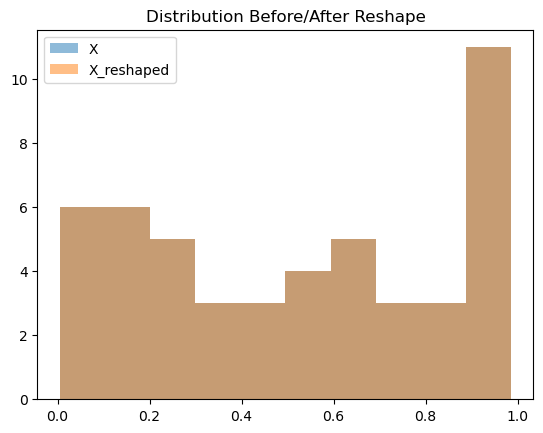

In [10]:
# גרף: השוואת התפלגות הערכים לפני ואחרי reshape
plt.hist(X.cpu().flatten().numpy(), bins=10, alpha=0.5, label='X')
plt.hist(X_reshaped.cpu().flatten().numpy(), bins=10, alpha=0.5, label='X_reshaped')
plt.legend()
plt.title('Distribution Before/After Reshape')
plt.show()

## י שינוי צורה עם $-1$ (השלמת מימד אוטומטית) י  

In [11]:
# Reshape ל-(7, 1, 7) עם -1
X_reshaped2 = X.reshape(7, 1, -1)
print(X_reshaped2)
print('Shape:', X_reshaped2.shape)

tensor([[[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821]],

        [[0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935]],

        [[0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380]],

        [[0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857, 0.0430]],

        [[0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106]],

        [[0.5948, 0.1885, 0.0705, 0.9756, 0.1516, 0.1020, 0.5220]],

        [[0.9566, 0.2248, 0.5625, 0.9226, 0.6155, 0.4774, 0.9515]]],
       device='mps:0')
Shape: torch.Size([7, 1, 7])


## י הצגת דוקומנטציה של פונקציה (דוג' $unsqueeze$) י  

In [12]:
# הצגת עזרה על torch.unsqueeze
help(torch.unsqueeze)

Help on built-in function unsqueeze in module torch:

unsqueeze(...)
    unsqueeze(input, dim) -> Tensor

    Returns a new tensor with a dimension of size one inserted at the
    specified position.

    The returned tensor shares the same underlying data with this tensor.

    A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
    can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
    applied at :attr:`dim` = ``dim + input.dim() + 1``.

    Args:
        input (Tensor): the input tensor.
        dim (int): the index at which to insert the singleton dimension

    Example::

        >>> x = torch.tensor([1, 2, 3, 4])
        >>> torch.unsqueeze(x, 0)
        tensor([[ 1,  2,  3,  4]])
        >>> torch.unsqueeze(x, 1)
        tensor([[ 1],
                [ 2],
                [ 3],
                [ 4]])



## י הוספת מימד נוסף עם $unsqueeze$ י  

In [13]:
# הוספת מימד חדש במיקום 0
X_unsqueezed = X.unsqueeze(dim=0)
print(X_unsqueezed)
print('Shape:', X_unsqueezed.shape)

tensor([[[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
         [0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935],
         [0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380],
         [0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857, 0.0430],
         [0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106],
         [0.5948, 0.1885, 0.0705, 0.9756, 0.1516, 0.1020, 0.5220],
         [0.9566, 0.2248, 0.5625, 0.9226, 0.6155, 0.4774, 0.9515]]],
       device='mps:0')
Shape: torch.Size([1, 7, 7])


## י הסרת מימדים בגודל 1 עם $squeeze$ י  

In [14]:
# הסרת מימדים בגודל 1
X_squeezed = X_unsqueezed.squeeze()
print(X_squeezed)
print('Shape:', X_squeezed.shape)

tensor([[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
        [0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935],
        [0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380],
        [0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857, 0.0430],
        [0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106],
        [0.5948, 0.1885, 0.0705, 0.9756, 0.1516, 0.1020, 0.5220],
        [0.9566, 0.2248, 0.5625, 0.9226, 0.6155, 0.4774, 0.9515]],
       device='mps:0')
Shape: torch.Size([7, 7])


## י חילוץ ערך בודד מטנסור עם $item()$ י  

In [15]:
# יצירת טנסור עם ערך בודד
X_single = torch.tensor([7.4], device=device)
X_single_value = X_single.item()
print('Value:', X_single_value)
print('Type:', type(X_single_value))

Value: 7.400000095367432
Type: <class 'float'>


## י המרת טנסור ל-$numpy$ ולהיפך (רק על $CPU$) י  

In [16]:
# ממירים רק טנסור שנמצא על ה-CPU ל-numpy (MPS לא נתמך כאן)
X_cpu = X.to('cpu')
X_np = X_cpu.numpy()
print('Numpy array:', X_np)
print('Type:', type(X_np))

# חזרה לטנסור פייטורץ׳
X_torch = torch.from_numpy(X_np).to(device)
print('Tensor:', X_torch)
print('Device:', X_torch.device)

Numpy array: [[0.33865684 0.7954326  0.58285755 0.77508605 0.9008715  0.24251282
  0.98207873]
 [0.36532384 0.22112489 0.7174219  0.12826115 0.54964745 0.08993089
  0.89350915]
 [0.00508201 0.19427228 0.39318782 0.6449222  0.9239481  0.22076738
  0.6379614 ]
 [0.8980484  0.94118863 0.2450552  0.07161367 0.1774385  0.9856881
  0.04297024]
 [0.785267   0.46720433 0.8405033  0.14412326 0.8521356  0.46234143
  0.610611  ]
 [0.594751   0.18849069 0.07054359 0.97559994 0.15156436 0.10203427
  0.5219663 ]
 [0.9565654  0.22481811 0.5624844  0.9225959  0.615517   0.4774027
  0.95146877]]
Type: <class 'numpy.ndarray'>
Tensor: tensor([[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
        [0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935],
        [0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380],
        [0.8980, 0.9412, 0.2451, 0.0716, 0.1774, 0.9857, 0.0430],
        [0.7853, 0.4672, 0.8405, 0.1441, 0.8521, 0.4623, 0.6106],
        [0.5948, 0.1885, 0.0705, 0.9756, 0.151

## י דוגמת אינדוקס וסלייסינג י  

In [17]:
# אינדוקס וסלייסינג
print('First row:', X[0])
print('First column:', X[:, 0])
print('First 3 rows:', X[:3])
print('Submatrix (1:4, 2:5):', X[1:4, 2:5])

First row: tensor([0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
       device='mps:0')
First column: tensor([0.3387, 0.3653, 0.0051, 0.8980, 0.7853, 0.5948, 0.9566],
       device='mps:0')
First 3 rows: tensor([[0.3387, 0.7954, 0.5829, 0.7751, 0.9009, 0.2425, 0.9821],
        [0.3653, 0.2211, 0.7174, 0.1283, 0.5496, 0.0899, 0.8935],
        [0.0051, 0.1943, 0.3932, 0.6449, 0.9239, 0.2208, 0.6380]],
       device='mps:0')
Submatrix (1:4, 2:5): tensor([[0.7174, 0.1283, 0.5496],
        [0.3932, 0.6449, 0.9239],
        [0.2451, 0.0716, 0.1774]], device='mps:0')


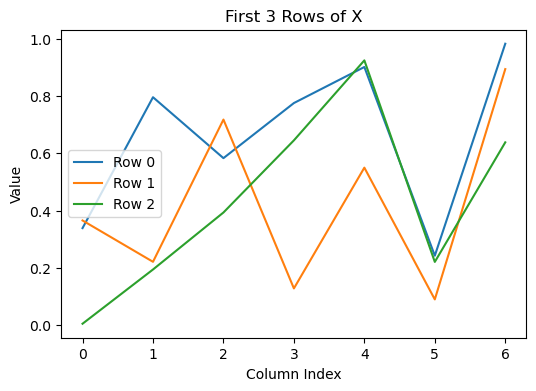

In [18]:
# גרף: הצגת שלוש השורות הראשונות כגרף קווי
plt.figure(figsize=(6,4))
for i in range(3):
    plt.plot(X[i].cpu().numpy(), label=f'Row {i}')
plt.legend()
plt.title('First 3 Rows of X')
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.show()

## י חישובים מתמטיים בסיסיים על טנסור י  

In [19]:
# דוגמאות לפעולות מתמטיות
print('Sum:', X.sum().item())
print('Mean:', X.mean().item())
print('Std:', X.std().item())
print('Var:', X.var().item())

Sum: 25.442846298217773
Mean: 0.5192417502403259
Std: 0.3222925364971161
Var: 0.10387247055768967


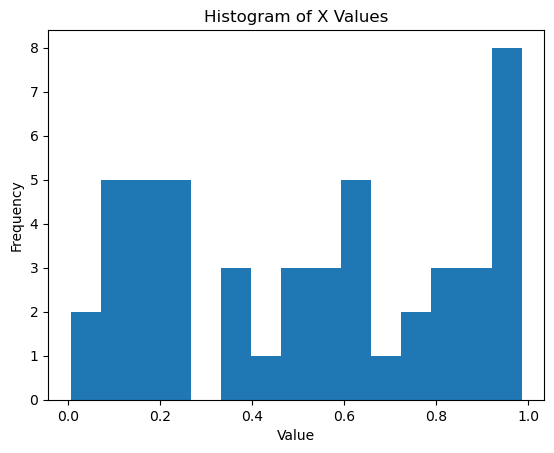

In [20]:
# גרף: התפלגות הערכים של X
plt.hist(X.cpu().flatten().numpy(), bins=15)
plt.title('Histogram of X Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## י $Autograd$ — נגזרות אוטומטיות ב-$PyTorch$ י  

In [21]:
# דוגמה: חישוב גרדיאנטים ב-Autograd
x = torch.randn(3, requires_grad=True, device=device)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print('Gradient (dx):', x.grad)

Gradient (dx): tensor([5.1879, 3.2665, 4.9099], device='mps:0')


## י בניית מודל פשוט ב-$PyTorch$ עם $nn.Module$ י  

In [22]:
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(4, 3)
        self.layer2 = nn.Linear(3, 1)
    def forward(self, x):
        x = self.layer1(x)
        x = torch.relu(x)
        x = self.layer2(x)
        return x

model = SimpleModel().to(device)
print(model)

SimpleModel(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=1, bias=True)
)


## י הגדרת פונקציית אובדן ואופטימייזר י  

In [23]:
# פונקציית אובדן ואופטימייזר
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## י דוגמת לולאת אימון בסיסית י  

In [24]:
# יצירת דאטה מלאכותי (dummy data) להתנסות
X_train = torch.randn(100, 4).to(device)
y_train = torch.randn(100, 1).to(device)

losses = []
for epoch in range(20):  # העליתי ל-20 בשביל לראות מגמה
    model.train()  # מצב אימון
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.5273
Epoch 1, Loss: 1.4858
Epoch 2, Loss: 1.4473
Epoch 3, Loss: 1.4118
Epoch 4, Loss: 1.3790
Epoch 5, Loss: 1.3486
Epoch 6, Loss: 1.3204
Epoch 7, Loss: 1.2944
Epoch 8, Loss: 1.2702
Epoch 9, Loss: 1.2478
Epoch 10, Loss: 1.2271
Epoch 11, Loss: 1.2078
Epoch 12, Loss: 1.1900
Epoch 13, Loss: 1.1734
Epoch 14, Loss: 1.1580
Epoch 15, Loss: 1.1437
Epoch 16, Loss: 1.1304
Epoch 17, Loss: 1.1180
Epoch 18, Loss: 1.1064
Epoch 19, Loss: 1.0957


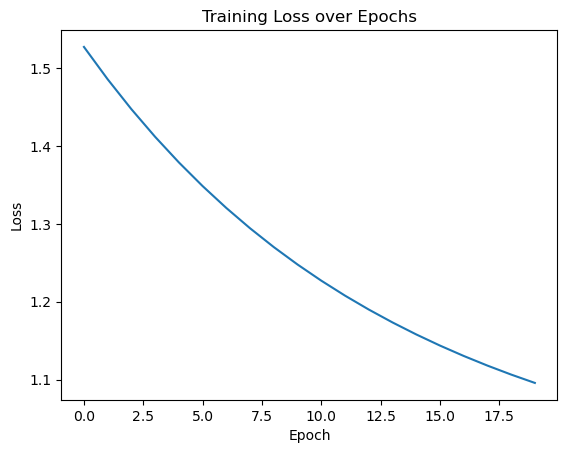

In [25]:
# גרף: מגמת ירידת האיבוד במהלך האימון
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## י הערכת המודל במצב בדיקה ($evaluation$) ללא חישוב גרדיאנטים י  

In [26]:
# יצירת דאטה בדיקה מלאכותי
X_test = torch.randn(20, 4).to(device)
y_test = torch.randn(20, 1).to(device)

model.eval()  # מצב הערכה
with torch.no_grad():
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, y_test)
print('Test Loss:', test_loss.item())

Test Loss: 0.627606213092804


## י הערות למשתמשי $MPS$ ($Apple$ $GPU$) י  
* י לא כל פונקציה/אופרטור של $PyTorch$ נתמכת על ידי $MPS$. י  
* י אם מתקבלת שגיאת $NotImplementedError$, ניתן לנסות להעביר ל-$cpu$ (לדוג׳: $tensor.to('cpu')$). י  
* י מומלץ לבדוק ביצועים ולוודא שאין חריגות מוזרות בהרצות על $GPU$ של $אפל$. י